# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy

# Import API key
from config import weather_api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



In [56]:
#!pip install citipy


## Generate Cities List

In [57]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

city_lats = []
city_longs = []


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    
    
    # If the city is unique, then add it to a our cities list
 ## also add estimated latitude and longitude ##
    if city not in cities:
        cities.append(city)      
        city_lats.append(lat_lng[0])
        city_longs.append(lat_lng[1])

        
 # Print the city count to confirm sufficient count   
print("{} cities have been identified to poll for weather".format(len(cities)))  

##        
city_list = pd.DataFrame({"City":cities, "Approx. Latitude":city_lats, "Approx. Longitude":city_longs})
      
#save to a csv (for reference - can compare estimated coordinates to actual coordinates if there is time, which cannot be done
#easily with citipy because the references only go one way -> approx. coordinates to city name, not city name to actual 
#coordinates)

city_list.to_csv("./CityNameList.csv")
city_list.head()
        
  

611 cities have been identified to poll for weather


,City,Approx. Latitude,Approx. Longitude
0,pisco,-21.031964,-86.019219
1,punta arenas,-69.381411,-117.034790
2,albany,-33.962444,119.143555
3,ushuaia,-83.666813,-58.663323
4,torbay,45.353053,-49.247245


In [58]:
# add columns for weather stats

city_list["Max Temp"] = ""
city_list["Humidity"] = ""
city_list["Cloudiness"] = ""
city_list["Wind Speed"] = ""
city_list["Date"] = ""

# change lat and lon name
city_list = city_list.rename(columns = {"Approx. Latitude":"Latitude","Approx. Longitude":"Longitude"})
  
city_list.rename(columns={"Approx. Latitude":"Latitude","Approx. Longitude":"Longitude"}, inplace=True)

city_list


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,pisco,-21.031964,-86.019219,,,,,
1,punta arenas,-69.381411,-117.034790,,,,,
2,albany,-33.962444,119.143555,,,,,
3,ushuaia,-83.666813,-58.663323,,,,,
4,torbay,45.353053,-49.247245,,,,,
...,...,...,...,...,...,...,...,...
606,comodoro rivadavia,-49.631714,-65.293058,,,,,
607,sarangani,4.216423,127.373966,,,,,
608,tecoanapa,5.829864,-102.076652,,,,,
609,altamira,-3.763786,-52.408734,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [59]:
#api call and saving data in df
#create lists for data retrieval

city_list = []
lat_list = []
lon_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
windspeed_list = []
counter = 1

owm_url="http://api.openweathermap.org/data/2.5/weather?"


print("Start Data Retrieval\n")

for city in cities[:5]:

#for city in cities:
    my_params = {"units":"Imperial","appid": weather_api_key, "q":city}    
    
    
    try:       
        weather_data = requests.get(owm_url, params = my_params).json()
        city_list.append(weather_data["name"])
        lat_list.append(weather_data["coord"]["lat"])
        lon_list.append(weather_data["coord"]["lon"])
        max_temp_list.append(weather_data["main"]["temp_max"])
        humidity_list.append(weather_data["main"]["humidity"])
        cloudiness_list.append(weather_data["clouds"]["all"])
        windspeed_list.append(weather_data["wind"]["speed"])
        print("Processing Record: " , counter, '|' , city)    
        print("__________________________________________")
        
    except:
        print(city, " not found")
        print("__________________________________________")
    counter+=1    
       
#print(weather_data)


Start Data Retrieval

Processing Record:  1 | pisco
__________________________________________
Processing Record:  2 | punta arenas
__________________________________________
Processing Record:  3 | albany
__________________________________________
Processing Record:  4 | ushuaia
__________________________________________
Processing Record:  5 | torbay
__________________________________________
grand river south east  not found
__________________________________________
Processing Record:  7 | nome
__________________________________________
Processing Record:  8 | inhambane
__________________________________________
Processing Record:  9 | provideniya
__________________________________________
Processing Record:  10 | vaini
__________________________________________
Processing Record:  11 | hilo
__________________________________________
Processing Record:  12 | barrow
__________________________________________
Processing Record:  13 | yeppoon
__________________________________________

Processing Record:  107 | dikson
__________________________________________
Processing Record:  108 | san clemente
__________________________________________
Processing Record:  109 | leningradskiy
__________________________________________
Processing Record:  110 | beira
__________________________________________
Processing Record:  111 | nara
__________________________________________
Processing Record:  112 | puerto ayora
__________________________________________
Processing Record:  113 | chokurdakh
__________________________________________
Processing Record:  114 | auki
__________________________________________
Processing Record:  115 | ahuimanu
__________________________________________
Processing Record:  116 | dawei
__________________________________________
Processing Record:  117 | nikolskoye
__________________________________________
Processing Record:  118 | kaura namoda
__________________________________________
Processing Record:  119 | port blair
______________________

Processing Record:  214 | lerwick
__________________________________________
Processing Record:  215 | lagos
__________________________________________
kuche  not found
__________________________________________
Processing Record:  217 | toktogul
__________________________________________
Processing Record:  218 | lipari
__________________________________________
Processing Record:  219 | pangnirtung
__________________________________________
Processing Record:  220 | kawardha
__________________________________________
Processing Record:  221 | fortuna
__________________________________________
Processing Record:  222 | turbat
__________________________________________
Processing Record:  223 | smolenka
__________________________________________
Processing Record:  224 | acapulco
__________________________________________
Processing Record:  225 | san ignacio
__________________________________________
Processing Record:  226 | romans-sur-isere
__________________________________________

Processing Record:  320 | bokoro
__________________________________________
Processing Record:  321 | basco
__________________________________________
Processing Record:  322 | dingle
__________________________________________
Processing Record:  323 | coari
__________________________________________
Processing Record:  324 | san miguelito
__________________________________________
Processing Record:  325 | plymouth
__________________________________________
Processing Record:  326 | labuhan
__________________________________________
Processing Record:  327 | vestmannaeyjar
__________________________________________
barentsburg  not found
__________________________________________
Processing Record:  329 | praia da vitoria
__________________________________________
Processing Record:  330 | fairbanks
__________________________________________
Processing Record:  331 | tiksi
__________________________________________
Processing Record:  332 | clarence town
______________________________

Processing Record:  427 | karratha
__________________________________________
Processing Record:  428 | codrington
__________________________________________
Processing Record:  429 | megion
__________________________________________
Processing Record:  430 | nyurba
__________________________________________
Processing Record:  431 | laurel
__________________________________________
Processing Record:  432 | novikovo
__________________________________________
Processing Record:  433 | moerai
__________________________________________
Processing Record:  434 | bianzhuang
__________________________________________
Processing Record:  435 | vendome
__________________________________________
malwan  not found
__________________________________________
tabiauea  not found
__________________________________________
Processing Record:  438 | benito juarez
__________________________________________
Processing Record:  439 | santa isabel do rio negro
__________________________________________
P

Processing Record:  534 | piney green
__________________________________________
paradwip  not found
__________________________________________
Processing Record:  536 | waddan
__________________________________________
Processing Record:  537 | zhigansk
__________________________________________
Processing Record:  538 | antofagasta
__________________________________________
Processing Record:  539 | port antonio
__________________________________________
Processing Record:  540 | mende
__________________________________________
kazalinsk  not found
__________________________________________
Processing Record:  542 | dakar
__________________________________________
Processing Record:  543 | svarstad
__________________________________________
Processing Record:  544 | mokrous
__________________________________________
Processing Record:  545 | kettering
__________________________________________
Processing Record:  546 | ostrovnoy
__________________________________________
Processing R

In [60]:
weather_data=pd.DataFrame({
    "City":city_list, 
    "Latitude": lat_list, 
    "Longitude":lon_list,
    "Max Temp":max_temp_list,
    "Humidity":humidity_list,
    "Cloudiness":cloudiness_list,
    "Wind Speed": windspeed_list,
  
})

weather_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pisco,-13.7000,-76.2167,63.01,82,48,21.85
1,Punta Arenas,-53.1500,-70.9167,35.71,87,20,13.80
2,Albany,42.6001,-73.9662,47.80,79,83,4.83
3,Ushuaia,-54.8000,-68.3000,33.46,93,75,11.50
4,Torbay,47.6666,-52.7314,59.77,95,90,13.80


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [61]:
#weather_data.to_csv("weatherData.csv",index = False)

In [17]:
weather_data=pd.read_csv("weatherData.csv")
weather_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,-33.9258,18.4232,60.28,71,75,2.30
1,Olafsvik,64.8945,-23.7142,45.46,92,100,12.55
2,Birao,10.2849,22.7882,76.53,73,98,4.65
3,Nālūt,30.3333,10.8500,75.81,38,100,4.32
4,Katherine,-14.4667,132.2667,82.72,61,5,6.91


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
#to remove all rows where column 'Humidity' is > 100:
high_humidity=weather_data[weather_data.Humidity > 100].index
print(high_humidity)

Int64Index([], dtype='int64')


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".




## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [33]:
weather_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,-33.9258,18.4232,60.28,71,75,2.30
1,Olafsvik,64.8945,-23.7142,45.46,92,100,12.55
2,Birao,10.2849,22.7882,76.53,73,98,4.65
3,Nālūt,30.3333,10.8500,75.81,38,100,4.32
4,Katherine,-14.4667,132.2667,82.72,61,5,6.91


## Latitude vs. Temperature Plot

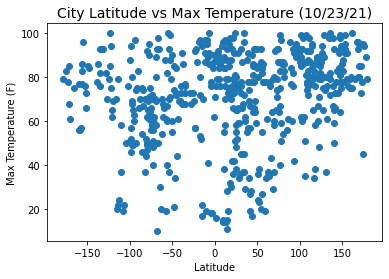

In [34]:
#plt.scatter(weather_data.iloc[:,1],weather_data.iloc[:,3])
plt.scatter(weather_data.iloc[:,2],weather_data.iloc[:,4])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs Max Temperature (10/23/21)", fontsize=14)
plt.savefig("1.png")
plt.show()

## Latitude vs. Humidity Plot

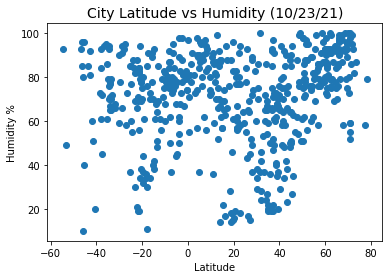

In [35]:
plt.scatter(weather_data.iloc[:,1],weather_data.iloc[:,4])
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title("City Latitude vs Humidity (10/23/21)", fontsize=14)
plt.savefig("2.png")
plt.show()

## Latitude vs. Cloudiness Plot

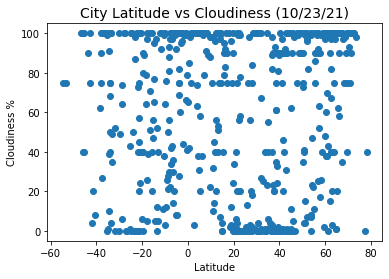

In [36]:
plt.scatter(weather_data.iloc[:,1],weather_data.iloc[:,5])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title("City Latitude vs Cloudiness (10/23/21)", fontsize=14)
plt.savefig("3.png")
plt.show()

## Latitude vs. Wind Speed Plot

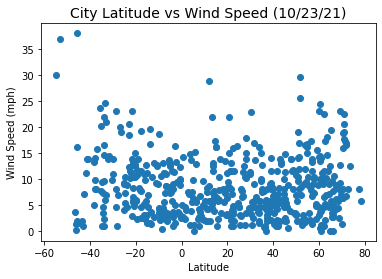

In [37]:
plt.scatter(weather_data.iloc[:,1],weather_data.iloc[:,6])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs Wind Speed (10/23/21)", fontsize=14)
plt.savefig("4.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared is :0.7589912593921974


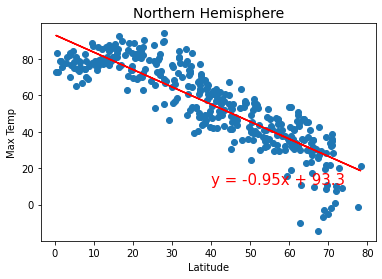

In [51]:
northern_hemisphere = weather_data.loc[weather_data.Latitude >=0]

x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_hemisphere.iloc[:,1],northern_hemisphere.iloc[:,3])
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,11),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Northern Hemisphere", fontsize=14)
print(f"r-squared is :{rvalue**2}")
plt.savefig("5.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared is :0.5437451548598211


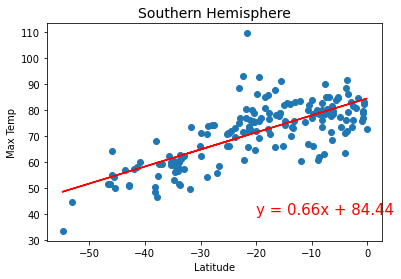

In [39]:
southern_hemisphere = weather_data.loc[weather_data.Latitude <=0]

x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_hemisphere.iloc[:,1],southern_hemisphere.iloc[:,3])
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere", fontsize=14)
print(f"r-squared is :{rvalue**2}")
plt.savefig("12.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared is :0.06202318877830948


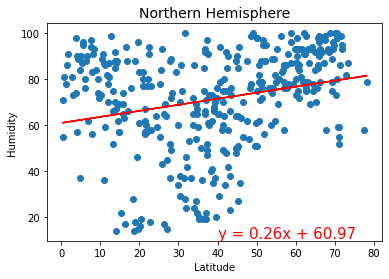

In [40]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_hemisphere.iloc[:,1],northern_hemisphere.iloc[:,4])
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,11),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Hemisphere", fontsize=14)
print(f"r-squared is :{rvalue**2}")
plt.savefig("7.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared is :0.0007628393659874657


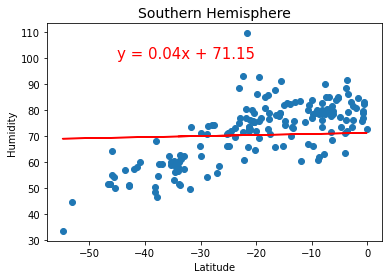

In [47]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_hemisphere.iloc[:,1],southern_hemisphere.iloc[:,3])
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,100),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Southern Hemisphere", fontsize=14)
print(f"r-squared is :{rvalue**2}")
plt.savefig("8.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared is :0.01831267685073915


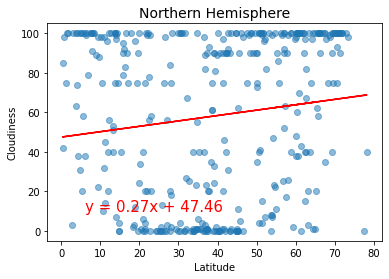

In [53]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_hemisphere.iloc[:,1],northern_hemisphere.iloc[:,5], alpha = .5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northern Hemisphere", fontsize=14)
print(f"r-squared is :{rvalue**2}")
plt.savefig("9.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared is :0.0007267417396550798


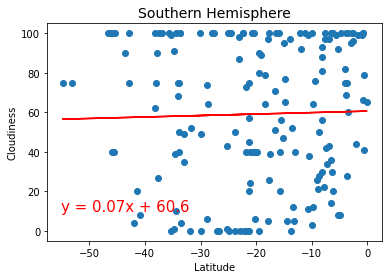

In [49]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_hemisphere.iloc[:,1],southern_hemisphere.iloc[:,5])
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere", fontsize=14)
print(f"r-squared is :{rvalue**2}")
plt.savefig("10.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared is :0.027896627968867292


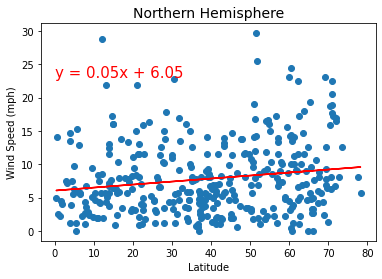

In [44]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_hemisphere.iloc[:,1],northern_hemisphere.iloc[:,6])
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0, 23),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Northern Hemisphere", fontsize=14)
print(f"r-squared is :{rvalue**2}")
plt.savefig("11.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared is :0.0844371511672965


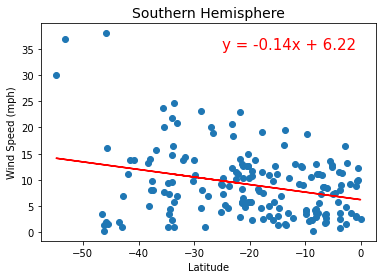

In [45]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_hemisphere.iloc[:,1],southern_hemisphere.iloc[:,6])
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Southern Hemisphere", fontsize=14)
print(f"r-squared is :{rvalue**2}")
plt.savefig("12.png")
plt.show()